# Simulation of the growth and development of an apple tree 2 - Architecture

In [2]:
import namedenum ; reload(namedenum)
from namedenum import enum
gutypes = enum('ShortGU', 'MediumGU', 'LongGU', 'Inflo', 'TrunkGU', 'Blind', 'SyllepticShort', 'SyllepticMedium', 'SyllepticLong')


def set_sylleptic(gutype):
    assert gutype in [ShortGU, MediumGU, LongGU]
    return gutype + 6

def set_proleptic(gutype):
    assert gutype in [SyllepticShort, SyllepticMedium, SyllepticLong]
    return gutype - 6
    


## Growth unit succession and flowering among years

In [3]:
sucessiontypes = [ShortGU, MediumGU, LongGU, Inflo]
successionmatrix = [[0.6, 0.0, 0.0, 0.4],
                    [0.5, 0.1, 0.0, 0.4],
                    [0.35, 0.15, 0.1, 0.4],
                    [0.95, 0.05, 0.0, 0]
                   ]
from random import uniform
from numpy import cumsum

def realization_in_probaranges(probas):
    cumsum_probs = cumsum(probas)
    totalprob = cumsum_probs[-1]
    cumsum_probs /= totalprob
    assert abs(cumsum_probs[-1] -1) < 1e-5
    unif_realization = float( uniform(0,1) )
    i = 0
    while unif_realization >= cumsum_probs[i] : i += 1
    return i

def succession(gutype):
    if gutype == TrunkGU : return LongGU
    probas = successionmatrix[gutype]
    return sucessiontypes[realization_in_probaranges(probas)]


Inflo
ShortGU
Succession Probabilities


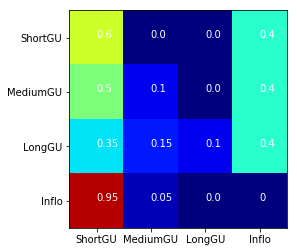

In [48]:
# Example of Use

print succession(LongGU)
print succession(Inflo)

print 'Succession Probabilities'

imshow(successionmatrix, cmap='jet', vmin = 0, vmax = 1)
xticks(range(4),map(str,sucessiontypes))
yticks(range(4),map(str,sucessiontypes))
for i in xrange(4):
    for j in xrange(4):
        text(i,j,str(successionmatrix[j][i]), color='w')
show()

## Branching probability

In [5]:
lateraltypes = [Blind, ShortGU, MediumGU, LongGU, Inflo, SyllepticShort, SyllepticMedium, SyllepticLong]

branchingmatrixlong = [[0.7,0.3,0.05,0.05,0,0,0,0],
[0.5,0.2,0.15,0.05,0,0,0,0],
[0.6,0.3,0.1,0,0,0,0,0],
[0.9,0.1,0,0,0,0,0,0],
[0.6,0.1,0,0,0,0.05,0.05,0.05],
[0.6,0.1,0.1,0,0,0.05,0.05,0],
[0.55,0.1,0,0,0.3,0.03,0,0],
[0.55,0.05,0.1,0.05,0.2,0.02,0,0],
[0.4,0.1,0.2,0.2,0.1,0,0,0],
[0.75,0.1,0.1,0.05,0,0,0,0]]

branchingmatrixmedium = [[0.7,0.3,0.0,0.0,0,0,0,0],
[0.5,0.2,0.15,0.00,0,0,0,0],
[0.6,0.3,0.1,0,0,0,0,0],
[0.9,0.1,0,0,0,0,0,0],
[0.6,0.1,0,0,0,0.05,0.05,0.05],
[0.6,0.1,0.1,0,0,0.05,0.05,0],
[0.55,0.1,0,0,0.0,0.03,0,0],
[0.55,0.05,0.1,0.00,0.2,0.02,0,0],
[0.4,0.1,0.2,0.0,0.1,0,0,0],
[0.75,0.1,0.1,0.00,0,0,0,0]]


def branching(gutype, u):
    i, _ = divmod(u, 0.1)
    if gutype in [ShortGU,Inflo] : return Blind
    branchingmatrix = branchingmatrixlong if gutype in [TrunkGU,LongGU] else branchingmatrixmedium
    probas = branchingmatrix[int(i)]
    return lateraltypes[realization_in_probaranges(probas)]


    

Branching Probabilities for Long GU


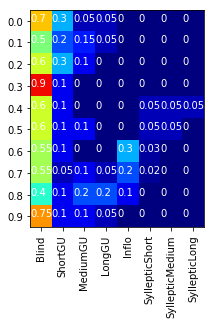

Branching Probabilities for Medium GU


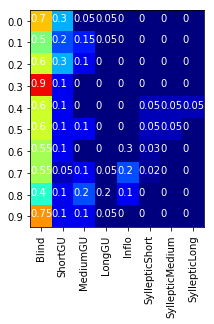

In [51]:
# Example of Use

from matplotlib.pyplot import *

print 'Branching Probabilities for Long GU'
imshow(branchingmatrixlong, cmap='jet', vmin = 0, vmax = 1)
xticks(range(len(lateraltypes)),map(str,lateraltypes),rotation=90)
nb = len(branchingmatrixlong)
yticks(range(nb),map(str,[0.1*i for i in range(nb)]))
for i in xrange(len(lateraltypes)):
    for j in xrange(nb):
        text(i-0.5,j,str(branchingmatrixlong[j][i]), color='w')
show()

print 'Branching Probabilities for Medium GU'
imshow(branchingmatrixmedium, cmap='jet', vmin = 0, vmax = 1)
xticks(range(len(lateraltypes)),map(str,lateraltypes),rotation=90)
nb = len(branchingmatrixlong)
yticks(range(nb),map(str,[0.1*i for i in range(nb)]))
for i in xrange(len(lateraltypes)):
    for j in xrange(nb):
        text(i-0.5,j,str(branchingmatrixlong[j][i]), color='w')
show()

## Modelling architecture development

Open in L-Py [the model architecture.lpy](./architecture.lpy).

- Change Probability of succession and  branching
- Add rule for flowering GU that always create a lateral short GU and a Flower in terminal position.


# Pipe model

Radius of each internode depends of the number of descendants. 

<center>
    $r_i = r_0 . n_i^{p}$
</center>
with $n_i$ the number of descendants of internode $i$, $r_0$ the radius of the extremity and $p$ the pipe exponent.

Open the model [pipemodel.lpy](./pipemodel.lpy) and test different value of $r_0$ and $p$.